### EDA - Missing Values 

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

# Introduce missing values intentionally
titanic_missing = titanic.copy()
titanic_missing.loc[::10, 'age'] = None  # Introduce missing values in the 'age' column
titanic_missing.loc[::15, 'embarked'] = None  # Introduce missing values in the 'embarked' column

C:\Users\Ajay Dhruv\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ajay Dhruv\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Ajay Dhruv\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Ajay Dhruv\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


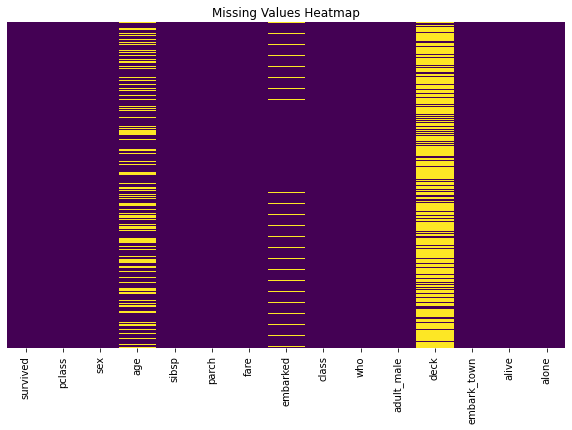

In [3]:
# Visualize missing values using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_missing.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

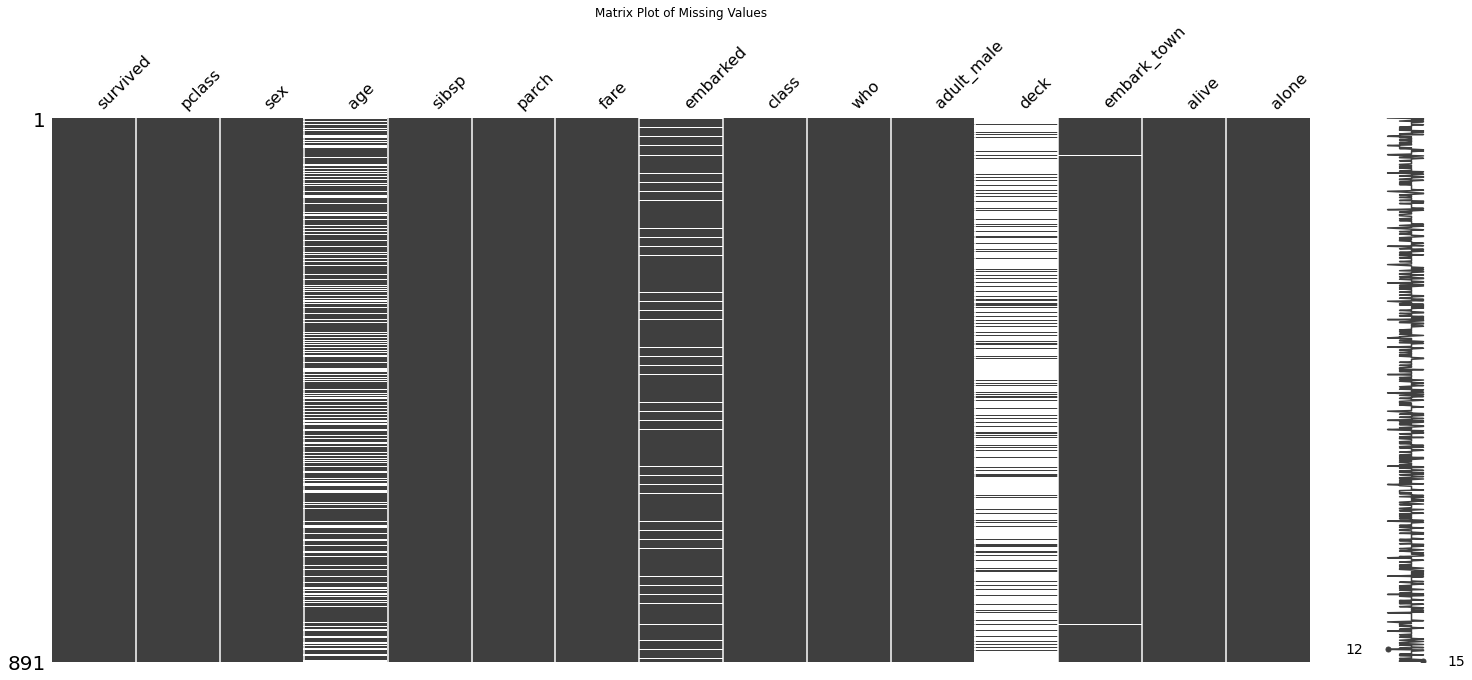

In [4]:
import missingno as msno

# Visualizing missing values using matrix plot
msno.matrix(titanic_missing)
plt.title('Matrix Plot of Missing Values')
plt.show()


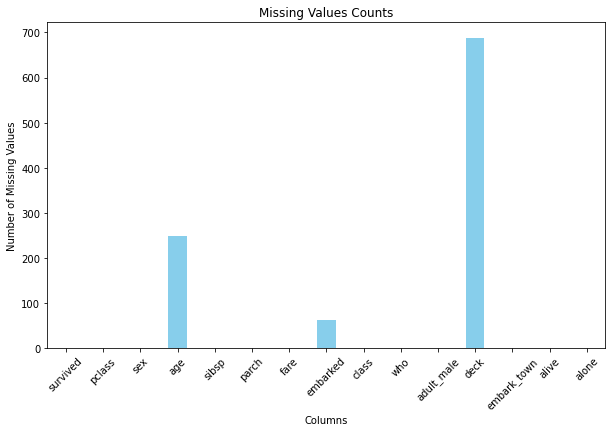

survived         0
pclass           0
sex              0
age            249
sibsp            0
parch            0
fare             0
embarked        62
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
# Visualize missing values using bar plot
plt.figure(figsize=(10, 6))
missing_counts = titanic_missing.isnull().sum()
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Missing Values Counts')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()
print(missing_counts)

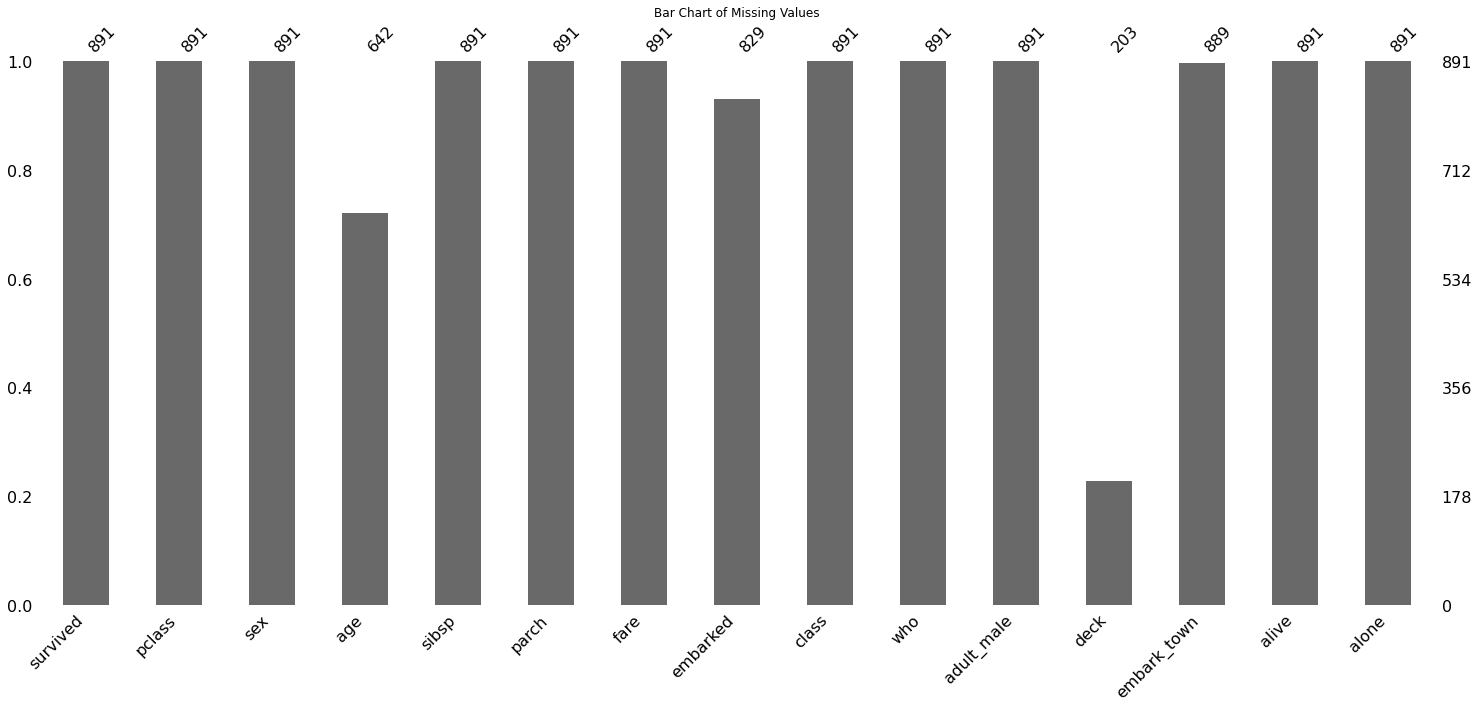

In [6]:
# Visualizing missing values using bar chart
msno.bar(titanic_missing)
plt.title('Bar Chart of Missing Values')
plt.show()

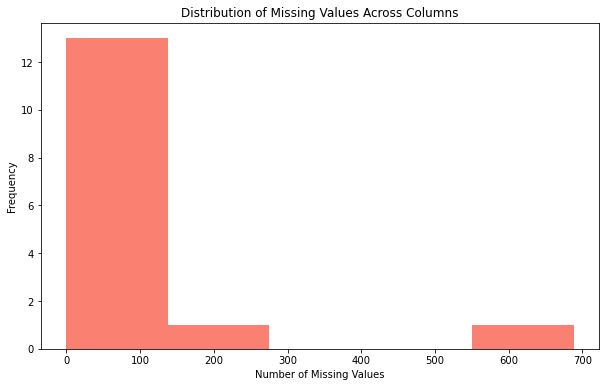

In [7]:
# Visualize missing values using histogram
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='hist', color='salmon', bins=5)
plt.title('Distribution of Missing Values Across Columns')
plt.xlabel('Number of Missing Values')
plt.ylabel('Frequency')
plt.show()


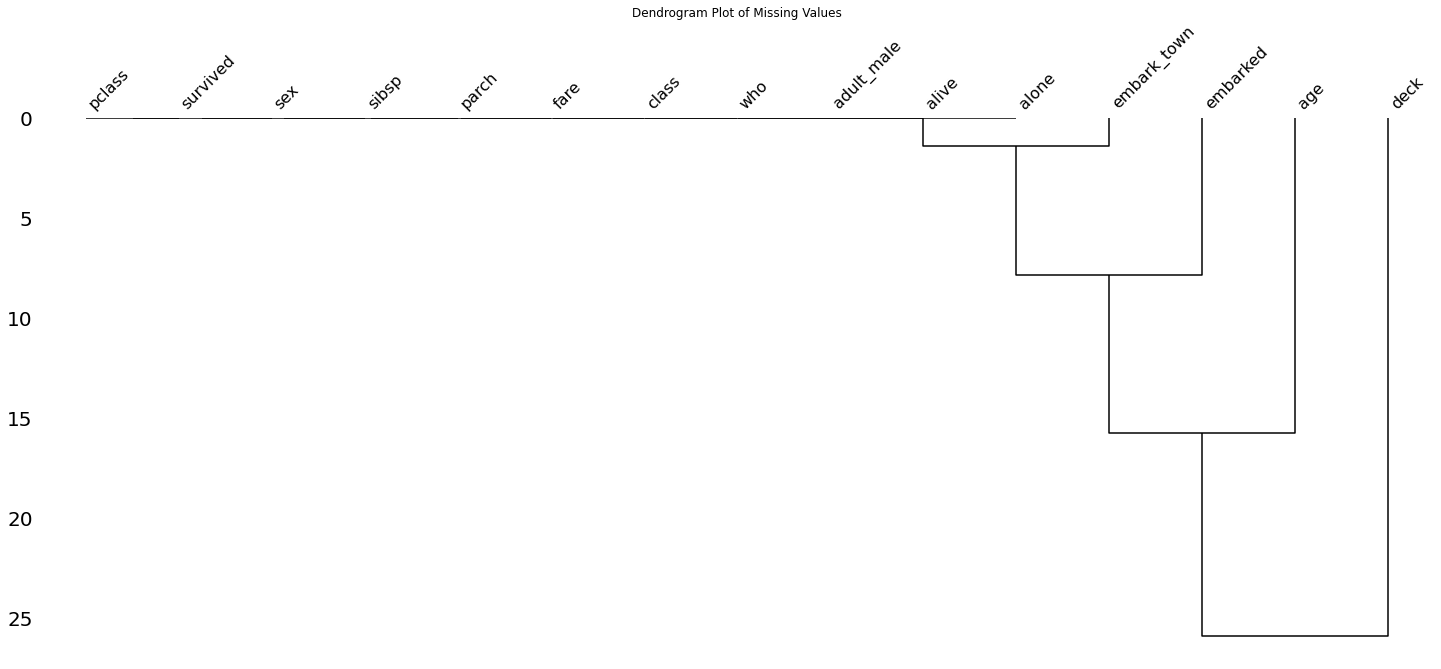

In [8]:
# Visualizing missing values using dendrogram plot
msno.dendrogram(titanic_missing)
plt.title('Dendrogram Plot of Missing Values')
plt.show()

### Identifying and dealing with duplicate values

In [9]:
# Create a sample DataFrame with duplicate rows
data = {
    'A': [1, 2, 3, 4, 1, 2],
    'B': ['a', 'b', 'c', 'd', 'a', 'b'],
    'C': ['x', 'y', 'z', 'x', 'x', 'z']
}
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

Original DataFrame:
   A  B  C
0  1  a  x
1  2  b  y
2  3  c  z
3  4  d  x
4  1  a  x
5  2  b  z


In [10]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame after removing duplicates
print("DataFrame after removing duplicates:")
print(df_no_duplicates)

DataFrame after removing duplicates:
   A  B  C
0  1  a  x
1  2  b  y
2  3  c  z
3  4  d  x
5  2  b  z


### Identifying Outliers

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


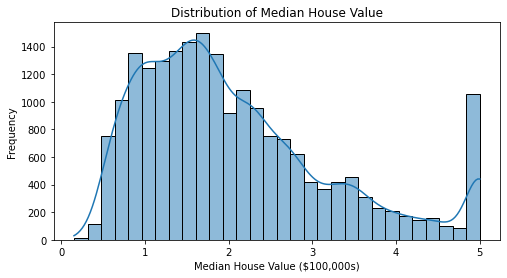

In [11]:
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
data = california_housing.frame

# Display the first few rows of the dataset
print(data.head())

# Visualize distribution of target variable (median house value)
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='MedHouseVal', bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()

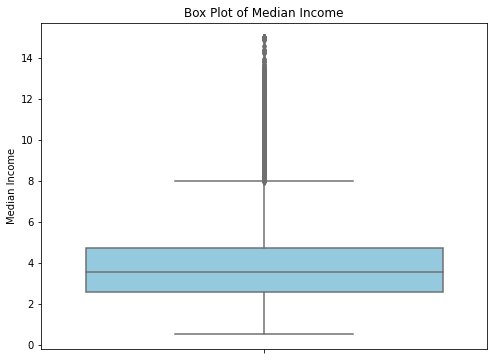

In [12]:
# Visualize outliers in a numerical feature (e.g., MedInc - median income)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='MedInc', color='skyblue')
plt.title('Box Plot of Median Income')
plt.ylabel('Median Income')
plt.show()


#### Identifying Outliers with the z-score method

In [14]:
numerical_feature = 'MedInc'

# Calculate Z-scores for the selected feature
z_scores = (data[numerical_feature] - data[numerical_feature].mean()) / data[numerical_feature].std()

# Set threshold for outlier detection (e.g., Z-score greater than 3)
threshold = 3

# Identify outliers
outliers = data[np.abs(z_scores) > threshold]

# Display outliers
print("Outliers detected using Z-score method:")
print(outliers)

Outliers detected using Z-score method:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
409    10.0825      52.0  8.209016   1.024590       658.0  2.696721     37.90   
510    11.8603      39.0  7.911111   0.984127       808.0  2.565079     37.82   
511    13.4990      42.0  8.928358   1.000000      1018.0  3.038806     37.82   
512    12.2138      52.0  9.210227   1.039773      1001.0  2.843750     37.82   
...        ...       ...       ...        ...         ...       ...       ...   
20376  10.2614      16.0  6.421277   0.919149       578.0  2.459574     34.16   
20380  10.1597      16.0  7.606936   1.121387       450.0  2.601156     34.14   
20389  10.0595      26.0  8.692308   1.076923       573.0  3.148352     34.19   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898  

In [15]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data[numerical_feature].quantile(0.25)
Q3 = data[numerical_feature].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Set threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers
outliers = data[(data[numerical_feature] < (Q1 - threshold * IQR)) | (data[numerical_feature] > (Q3 + threshold * IQR))]

# Display outliers
print("Outliers detected using IQR method:")
print(outliers)

Outliers detected using IQR method:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1       8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
134     8.2049      28.0  6.978947   0.968421       463.0  2.436842     37.83   
135     8.4010      26.0  7.530806   1.056872       542.0  2.568720     37.83   
...        ...       ...       ...        ...         ...       ...       ...   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20427   8.6499       4.0  7.236059   1.032528      5495.0  2.553439     34.19   
20428   8.7288       6.0  8.715842   1.102970      3385.0  3.351485     34.23   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21   
20503   8.2787      27.0  6.935065   1.103896       243.0  3.155844     3